In [3]:
!pip install openpyxl

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [18]:
file_path = '/content/drive/MyDrive/task delay predictor/dataset.xlsx'
temp_df = pd.read_excel(file_path, engine='openpyxl', skiprows=9, nrows=0)
n_cols = temp_df.shape[1]
df = pd.read_excel(file_path, engine='openpyxl', skiprows=9, usecols=list(range(3, n_cols)))

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [19]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1.1    68 non-null     int64
 1   X1.2    68 non-null     int64
 2   X1.3    68 non-null     int64
 3   X1.4    68 non-null     int64
 4   X1.5    68 non-null     int64
 5   X1.6    68 non-null     int64
 6   X1.7    68 non-null     int64
 7   X1.8    68 non-null     int64
 8   X1.9    68 non-null     int64
 9   X2.1    68 non-null     int64
 10  X2.2    68 non-null     int64
 11  X2.3    68 non-null     int64
 12  X3.1    68 non-null     int64
 13  X3.2    68 non-null     int64
 14  X3.3    68 non-null     int64
 15  X3.4    68 non-null     int64
 16  X4.1    68 non-null     int64
 17  X4.2    68 non-null     int64
 18  X4.3    68 non-null     int64
 19  X4.4    68 non-null     int64
 20  X4.5    68 non-null     int64
 21  X5.1    68 non-null     int64
 22  X5.2    68 non-null     int64
 23  X5.3    68 non-nu

In [21]:

feature_cols = [col for col in df.columns if col.startswith('X')]
target_cols = ['Y1', 'Y2', 'Y3', 'Y4']

X = df[feature_cols]
y = df[target_cols]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

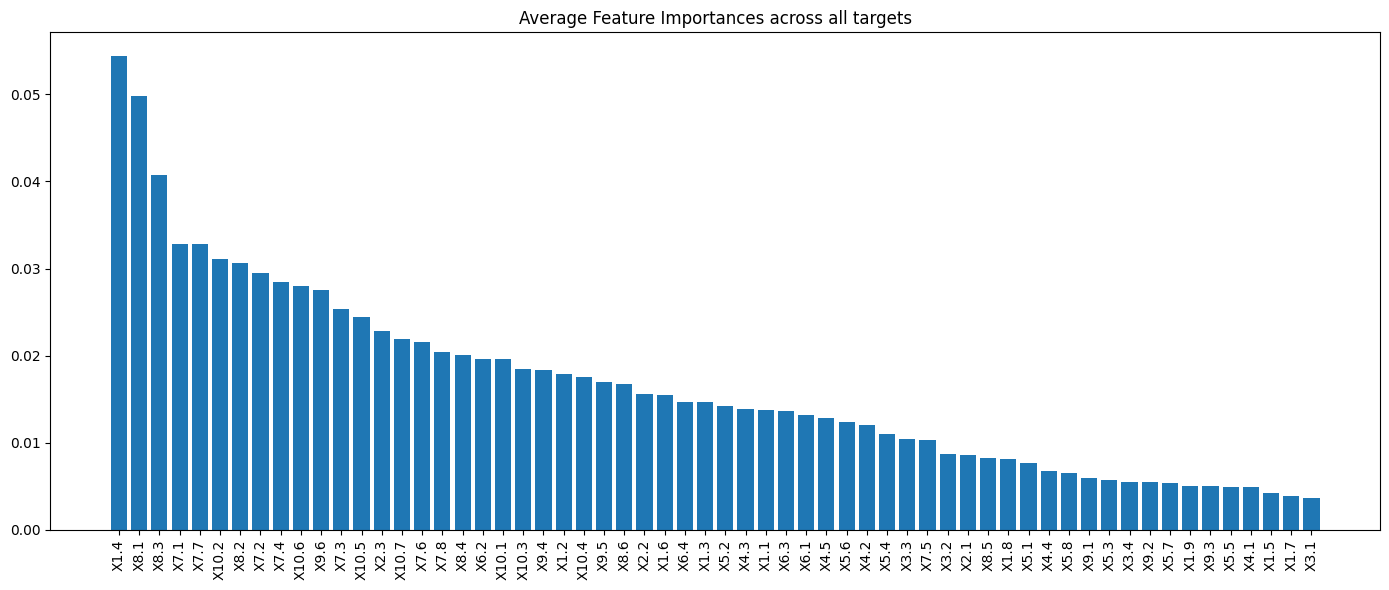

In [24]:
importances = np.mean([est.feature_importances_ for est in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 6))
plt.title("Average Feature Importances across all targets")
plt.bar(range(len(feature_cols)), importances[indices], align="center")
plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [25]:
joblib.dump(rf, '/content/drive/MyDrive/task delay predictor/rf_model_all_targets.pkl')
print("✅ Model saved successfully.")

✅ Model saved successfully.
